In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
import xlrd

In [319]:
df_ts=pd.read_excel(r'C:\Users\Ankita\OneDrive - Infiniti Research\Desktop\Volume_Sales_Data.xlsx', sheet_name='Volume')
df_ts.head()

,Scenario,Periods,Volume
0,Actual,2017-01-01,201003.079338
1,Actual,2017-02-01,206740.982113
2,Actual,2017-03-01,251304.277397
3,Actual,2017-04-01,282019.251589
4,Actual,2017-05-01,340877.156271


In [320]:
df_actual=pd.read_excel(r'C:\Users\Ankita\OneDrive - Infiniti Research\Desktop\Volume_Sales_Data.xlsx', sheet_name='Variables')

In [321]:
df_final=pd.merge(left=df_actual, right=df_ts, how='left', left_on='Periods', right_on='Periods')

In [322]:
df_final

,Periods,Province,Prcp Total,Tavg,Tmax,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Nominal GDP Per Capita, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Private Consumption, US$_Quarterly",Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,Unemployment Rate_Quarterly,"Real Consumption Per Capita, US$_Quarterly","Real GDP (Gross Domestic Product), US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",SD,StringencyIndex,Scenario,Volume
0,2017-01-01,ONTARIO,42.0000,20.5000,27.4000,102.798446,108.141005,103.139119,99.202982,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,22,0.0,Actual,201003.079338
1,2017-02-01,ONTARIO,43.0000,22.1000,31.2000,102.640416,107.625725,102.585456,99.937554,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,20,0.0,Actual,206740.982113
2,2017-03-01,ONTARIO,39.0000,23.9000,33.7000,102.482386,105.746715,102.976041,98.369110,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,23,0.0,Actual,251304.277397
3,2017-04-01,ONTARIO,66.0000,42.6000,53.2000,102.798446,106.948659,103.015607,98.593935,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,20,0.0,Actual,282019.251589
4,2017-05-01,ONTARIO,78.0000,51.0000,61.3000,102.640416,105.221726,104.310608,97.235334,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,23,0.0,Actual,340877.156271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2024-01-01,ONTARIO,30.7778,15.9111,23.7667,117.933853,149.970145,109.513610,130.306974,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,23,0.0,NaN,NaN
85,2024-02-01,ONTARIO,28.0000,13.6222,23.2333,118.128661,149.768018,109.498468,130.086002,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,21,0.0,NaN,NaN
86,2024-03-01,ONTARIO,33.0000,28.6111,39.4444,118.323995,149.478440,109.483327,129.789188,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,21,0.0,NaN,NaN
87,2024-04-01,ONTARIO,44.1111,40.5889,51.2111,118.519909,150.684031,109.656792,130.565519,1272.947975,1007.569524,2305.353853,58613.22658,536.497640,514.369457,1287.532804,25.174161,7.779959,6.000006,27490.97943,1824.735110,46393.57742,1252.314386,22,0.0,NaN,NaN


In [323]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 27 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Periods                                              89 non-null     datetime64[ns]
 1   Province                                             89 non-null     object        
 2   Prcp Total                                           89 non-null     float64       
 3   Tavg                                                 89 non-null     float64       
 4   Tmax                                                 89 non-null     float64       
 5   Consumer Price Index_Monthly                         89 non-null     float64       
 6   Index, Retail Sales, Nominal (US$ Value)_Monthly     89 non-null     float64       
 7   Industrial Production Index_Monthly                  89 non-null     float64       
 8   Wh

In [324]:
# A time-series SARIMAX model has the following assumptions which have to be met before fitting the model
#1. The index is datetime (which is done in the following step)
#2. Series is stationary i.e. the parameters that describe the time series aren’t changing over time or are not affected by 
#.Components of seasonality, trend etc (have done this with the adf test to check stationarity
#and transformed into a stationary series by taking the difference and converting the series into log)

In [325]:
df_final.set_index(df_final.Periods, inplace=True)

In [326]:
df_final['Year']=df_final.Periods.dt.year
df_final['Month']=df_final.Periods.dt.month

In [327]:
df_final.tail()

,Periods,Province,Prcp Total,Tavg,Tmax,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Nominal GDP Per Capita, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Private Consumption, US$_Quarterly",Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,Unemployment Rate_Quarterly,"Real Consumption Per Capita, US$_Quarterly","Real GDP (Gross Domestic Product), US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",SD,StringencyIndex,Scenario,Volume,Year,Month
Periods,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,ONTARIO,30.7778,15.9111,23.7667,117.933853,149.970145,109.513610,130.306974,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,23,0.0,NaN,NaN,2024,1
2024-02-01,2024-02-01,ONTARIO,28.0000,13.6222,23.2333,118.128661,149.768018,109.498468,130.086002,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,21,0.0,NaN,NaN,2024,2
2024-03-01,2024-03-01,ONTARIO,33.0000,28.6111,39.4444,118.323995,149.478440,109.483327,129.789188,1273.191763,1004.947407,2295.223792,58509.50673,531.392767,513.174572,1283.670145,25.162164,7.714699,6.099997,27364.68312,1811.642147,46182.11467,1244.171038,21,0.0,NaN,NaN,2024,3
2024-04-01,2024-04-01,ONTARIO,44.1111,40.5889,51.2111,118.519909,150.684031,109.656792,130.565519,1272.947975,1007.569524,2305.353853,58613.22658,536.497640,514.369457,1287.532804,25.174161,7.779959,6.000006,27490.97943,1824.735110,46393.57742,1252.314386,22,0.0,NaN,NaN,2024,4
2024-05-01,2024-05-01,ONTARIO,42.1111,52.6444,64.4444,118.716766,150.644338,109.830533,130.261296,1272.947975,1007.569524,2305.353853,58613.22658,536.497640,514.369457,1287.532804,25.174161,7.779959,6.000006,27490.97943,1824.735110,46393.57742,1252.314386,23,0.0,NaN,NaN,2024,5


In [328]:
df_final['Covid_flag']=np.where(df_final.Periods<'2020-03-01',0, np.where(df_final.Periods<='2020-07-01',1,np.where(df_final.Periods<='2021-03-01',0,np.where(df_final.Periods<='2021-06-01',1,np.where(df_final.Periods<='2021-11-01',0,np.where(df_final.Periods<='2022-02-01',1,0))))))

In [329]:
df_final.drop(['Province','Scenario'], axis=1, inplace=True)

In [330]:
dummies = pd.get_dummies(df_final['Month'])

In [331]:
df_final = pd.concat([df_final, dummies], axis=1) 

In [332]:
df_final.drop('Month',axis=1,inplace=True)

In [333]:
df_final.rename(columns={1:'Jan',2:'Feb',3:'March',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [334]:
df=df_final[:'2021-10-01']  
df.drop('Periods',axis=1, inplace=True)
df.columns

Index(['Prcp Total', 'Tavg', 'Tmax', 'Consumer Price Index_Monthly',
       'Index, Retail Sales, Nominal (US$ Value)_Monthly',
       'Industrial Production Index_Monthly',
       'Wholesale-Producer Price Index, US$ basis_Monthly',
       'Disposable Personal Income, US$_Quarterly',
       'Disposable personal income, real, US$_Quarterly',
       'Nominal GDP (Gross Domestic Product), US$_Quarterly',
       'Nominal GDP Per Capita, US$_Quarterly',
       'Nominal Gross Domestic Saving, US$_Quarterly',
       'Nominal Gross Private Saving, US$_Quarterly',
       'Nominal Private Consumption, US$_Quarterly',
       'Population: Age Bracket 15-64_Quarterly',
       'Population: Age Bracket 65+_Quarterly', 'Unemployment Rate_Quarterly',
       'Real Consumption Per Capita, US$_Quarterly',
       'Real GDP (Gross Domestic Product), US$_Quarterly',
       'Real GDP Per Capita, US$_Quarterly',
       'Real GDP at Factor Cost: Services, US$_Quarterly', 'SD',
       'StringencyIndex', 'Volume

# Feature selection

In [335]:
# Bucketing the variables and checking the correlation with Y. Only picking up those variables from each bucket 
# which have a high correlation with Y

index_bucket = [i for i in df.columns if "index" in i.lower()]
income_bucket=[i for i in df.columns if "income" in i.lower()]
GDP_bucket=[i for i in df.columns if "GDP" in i.upper()]
saving_bucket=[i for i in df.columns if "saving" in i.lower()]
consumption_bucket=[i for i in df.columns if "consumption" in i.lower()]
pop_bucket=[i for i in df.columns if "population" in i.lower()]
covid_bucket=[i for i in df.columns if "covid" in i.lower()]

weather_bucket=list(df[['Prcp Total', 'Tavg', 'Tmax','Volume']])
time_bucket=list(df[['Year','Jan', 'Feb',
       'March', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec','Volume']])

In [336]:
index=df[index_bucket]
index['Volume']=df['Volume']

income=df[income_bucket]
income['Volume']=df['Volume']

GDP=df[GDP_bucket]
GDP['Volume']=df['Volume']

saving=df[saving_bucket]
saving['Volume']=df['Volume']

consumption=df[consumption_bucket]
consumption['Volume']=df['Volume']

pop=df[pop_bucket]
pop['Volume']=df['Volume']

covid=df[covid_bucket]
covid['Volume']=df['Volume']

In [337]:
index.corr()
# Picking up Industrial prod and stringency index in the final list 

,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly",StringencyIndex,Volume
Consumer Price Index_Monthly,1.000000,0.565528,-0.117285,0.702480,0.717977,0.032969
"Index, Retail Sales, Nominal (US$ Value)_Monthly",0.565528,1.000000,0.373741,0.840865,0.348475,0.050237
Industrial Production Index_Monthly,-0.117285,0.373741,1.000000,0.170222,-0.647319,-0.107873
"Wholesale-Producer Price Index, US$ basis_Monthly",0.702480,0.840865,0.170222,1.000000,0.504642,0.046804
StringencyIndex,0.717977,0.348475,-0.647319,0.504642,1.000000,0.147823
Volume,0.032969,0.050237,-0.107873,0.046804,0.147823,1.000000


In [338]:
income.corr()
# picking up Disposable personal income, real, US$_Quarterly from this bucket

,"Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly",Volume
"Disposable Personal Income, US$_Quarterly",1.000000,0.779389,0.122014
"Disposable personal income, real, US$_Quarterly",0.779389,1.000000,0.184546
Volume,0.122014,0.184546,1.000000


In [339]:
GDP.corr()
# Picking up Real GDP per capita from this bucket

,"Nominal GDP (Gross Domestic Product), US$_Quarterly","Nominal GDP Per Capita, US$_Quarterly","Real GDP (Gross Domestic Product), US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",Volume
"Nominal GDP (Gross Domestic Product), US$_Quarterly",1.000000,0.976145,0.688779,0.376287,0.797866,-0.056479
"Nominal GDP Per Capita, US$_Quarterly",0.976145,1.000000,0.722684,0.515013,0.790580,-0.070968
"Real GDP (Gross Domestic Product), US$_Quarterly",0.688779,0.722684,1.000000,0.848648,0.960028,-0.192886
"Real GDP Per Capita, US$_Quarterly",0.376287,0.515013,0.848648,1.000000,0.703163,-0.194668
"Real GDP at Factor Cost: Services, US$_Quarterly",0.797866,0.790580,0.960028,0.703163,1.000000,-0.166486
Volume,-0.056479,-0.070968,-0.192886,-0.194668,-0.166486,1.000000


In [340]:
# picking up Nominal Gross Private Saving, US$_Quarterly from this bucket
saving.corr()

,"Nominal Gross Domestic Saving, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly",Volume
"Nominal Gross Domestic Saving, US$_Quarterly",1.000000,0.582571,-0.023024
"Nominal Gross Private Saving, US$_Quarterly",0.582571,1.000000,0.174207
Volume,-0.023024,0.174207,1.000000


In [341]:
# picking up Real Consumption Per Capita, US$_Quarterly from this bucket
consumption.corr()

,"Nominal Private Consumption, US$_Quarterly","Real Consumption Per Capita, US$_Quarterly",Volume
"Nominal Private Consumption, US$_Quarterly",1.000000,0.532273,-0.109961
"Real Consumption Per Capita, US$_Quarterly",0.532273,1.000000,-0.185093
Volume,-0.109961,-0.185093,1.000000


In [342]:
pop.corr()
# picking up Population: Age Bracket 65+_Quarterly from this bucket

,Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,Volume
Population: Age Bracket 15-64_Quarterly,1.000000,0.993418,0.049994
Population: Age Bracket 65+_Quarterly,0.993418,1.000000,0.053825
Volume,0.049994,0.053825,1.000000


In [343]:
covid.corr()

,Covid_flag,Volume
Covid_flag,1.000000,0.370255
Volume,0.370255,1.000000


In [344]:
df[weather_bucket].corr()
# from the weather bucket, the most correlated var is T max and Prcp Total 

,Prcp Total,Tavg,Tmax,Volume
Prcp Total,1.000000,0.582779,0.567099,0.416048
Tavg,0.582779,1.000000,0.997989,0.828597
Tmax,0.567099,0.997989,1.000000,0.840103
Volume,0.416048,0.828597,0.840103,1.000000


In [345]:
df[time_bucket].corr()
# Jan, feb and June are correlated with Y so taking those variables in the final list

,Year,Jan,Feb,March,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Volume
Year,1.000000,0.015262,0.015262,0.015262,0.015262,0.015262,0.015262,0.015262,0.015262,0.015262,0.015262,-0.084525,-0.084525,0.015019
Jan,0.015262,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,-0.414867
Feb,0.015262,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,-0.412095
March,0.015262,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,-0.111933
Apr,0.015262,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,-0.057773
May,0.015262,-0.094340,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,0.298977
June,0.015262,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,0.496220
July,0.015262,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.094340,-0.083595,-0.083595,0.389087
Aug,0.015262,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.094340,-0.083595,-0.083595,0.281276
Sep,0.015262,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,-0.094340,1.000000,-0.094340,-0.083595,-0.083595,-0.067316


In [346]:
Final_list1=df[['Industrial Production Index_Monthly','StringencyIndex','Disposable personal income, real, US$_Quarterly',
               'Real GDP Per Capita, US$_Quarterly','Nominal Gross Private Saving, US$_Quarterly',
               'Real Consumption Per Capita, US$_Quarterly','Population: Age Bracket 65+_Quarterly','Covid_flag',
                'Tmax','Jan','Feb','June']]

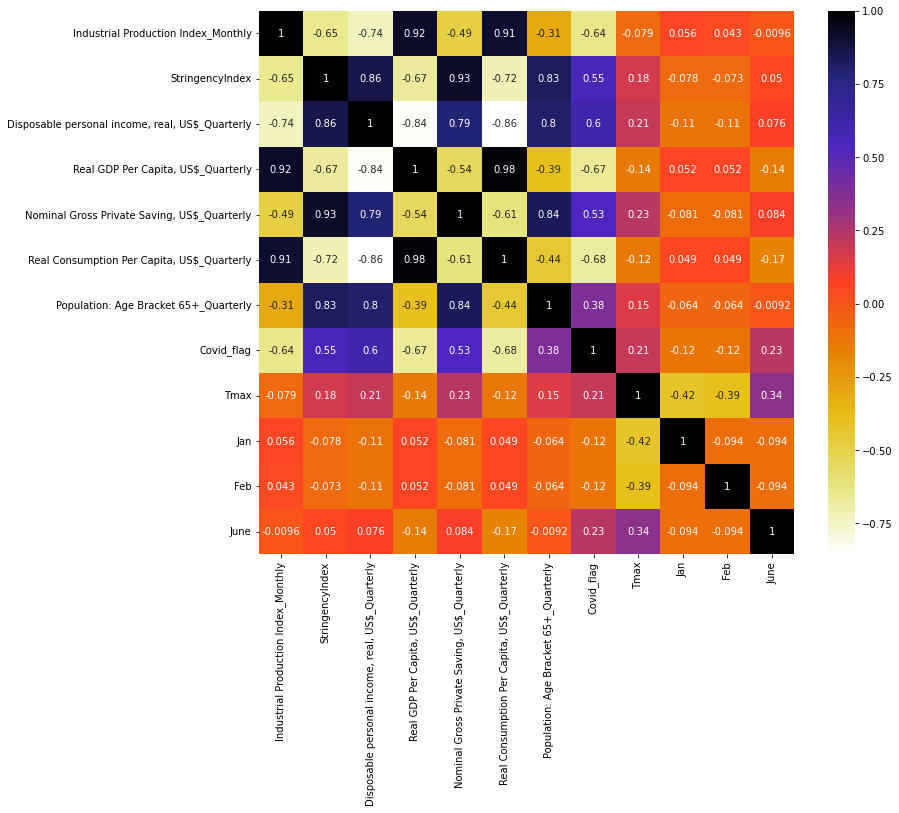

In [347]:
corr=Final_list1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# From the final list , removing all features that have more than 70% correlation amongst each other

# removing industrial prod, stringency index,

In [348]:
# Defining a correlation function to extract features that are highly correlated with each other
def correlation (df, threshold):
    col_corr=set() # set of all names of correlated features
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [349]:
corr_features=correlation(Final_list1, 0.7)
len(set(corr_features))

5

In [350]:
corr_features
# All these features are highly correlated in our final list and hence dropping all these features

{'Disposable personal income, real, US$_Quarterly',
 'Nominal Gross Private Saving, US$_Quarterly',
 'Population: Age Bracket 65+_Quarterly',
 'Real Consumption Per Capita, US$_Quarterly',
 'Real GDP Per Capita, US$_Quarterly'}

In [351]:
Final_list1.drop(['Disposable personal income, real, US$_Quarterly',
 'Nominal Gross Private Saving, US$_Quarterly',
 'Population: Age Bracket 65+_Quarterly',
 'Real Consumption Per Capita, US$_Quarterly',
 'Real GDP Per Capita, US$_Quarterly'],axis=1,inplace=True)

In [352]:
Final_list1

,Industrial Production Index_Monthly,StringencyIndex,Covid_flag,Tmax,Jan,Feb,June
Periods,,,,,,,
2017-01-01,103.139119,0.000000,0,27.4,1,0,0
2017-02-01,102.585456,0.000000,0,31.2,0,1,0
2017-03-01,102.976041,0.000000,0,33.7,0,0,0
2017-04-01,103.015607,0.000000,0,53.2,0,0,0
2017-05-01,104.310608,0.000000,0,61.3,0,0,0
2017-06-01,104.203939,0.000000,0,72.5,0,0,1
2017-07-01,104.510311,0.000000,0,77.1,0,0,0
2017-08-01,103.662038,0.000000,0,73.7,0,0,0
2017-09-01,103.942746,0.000000,0,70.6,0,0,0


In [353]:
import statsmodels.api as sm 

In [354]:
# Defining X and Y variables and checking the p-values of final list through backward elimination
X=df.drop('Volume', axis=1)
Y=df.Volume

from sklearn.feature_selection import RFE

In [355]:
regressor_OLS = sm.OLS(endog = Y, exog = Final_list1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Volume   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1002.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    2.79e-52
Time:                        13:22:50   Log-Likelihood:                         -667.05
No. Observations:                  58   AIC:                                      1348.
Df Residuals:                      51   BIC:                                      1363.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Industrial Production Index_Monthly  1751.5482    120.886     14.489      0.000    1508.860    1994.237
StringencyIndex                       -92.7331    124.816     -0.743      0.461    -343.312     157.846
Covid_flag                           4.496e+04   1.21e+04      3.716      0.001    2.07e+04    6.93e+04
Tmax                                 1728.9300    220.841      7.829      0.000    1285.573    2172.287
Jan                                 -2.241e+04   1.39e+04     -1.613      0.113   -5.03e+04    5477.420
Feb                                 -2.452e+04   1.37e+04     -1.790      0.079    -5.2e+04    2980.577
June                                   3.8e+04    1.3e+04      2.921      0.005    1.19e+04    6.41e+04
==============================================================================
Omnibus:                        1.058   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.505
Skew:                          -0.193   Prob(JB):                        0.777
Kurtosis:                       3.244   Cond. No.                         574.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
#Dropping Stringency Index as it has high P-Value
Final_list1.drop('StringencyIndex',axis=1,inplace=True)

In [357]:
regressor_OLS = sm.OLS(endog = Y, exog = Final_list1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Volume   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1179.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    1.02e-53
Time:                        13:22:51   Log-Likelihood:                         -667.36
No. Observations:                  58   AIC:                                      1347.
Df Residuals:                      52   BIC:                                      1359.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Industrial Production Index_Monthly  1751.5685    120.364     14.552      0.000    1510.040    1993.097
Covid_flag                           4.004e+04   1.01e+04      3.971      0.000    1.98e+04    6.03e+04
Tmax                                 1701.1233    216.707      7.850      0.000    1266.269    2135.977
Jan                                 -2.314e+04   1.38e+04     -1.677      0.100   -5.08e+04    4551.270
Feb                                 -2.525e+04   1.36e+04     -1.856      0.069   -5.26e+04    2050.913
June                                 3.938e+04   1.28e+04      3.072      0.003    1.37e+04    6.51e+04
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.198
Skew:                          -0.137   Prob(JB):                        0.906
Kurtosis:                       3.086   Cond. No.                         555.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
# Further Dropping Jan with High P value
Final_list1.drop('Jan',axis=1,inplace=True)

In [359]:
regressor_OLS = sm.OLS(endog = Y, exog = Final_list1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Volume   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1368.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    1.03e-54
Time:                        13:22:52   Log-Likelihood:                         -668.89
No. Observations:                  58   AIC:                                      1348.
Df Residuals:                      53   BIC:                                      1358.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Industrial Production Index_Monthly  1639.6082    101.843     16.099      0.000    1435.336    1843.880
Covid_flag                           4.024e+04   1.03e+04      3.924      0.000    1.97e+04    6.08e+04
Tmax                                 1877.1440    192.797      9.736      0.000    1490.441    2263.847
Feb                                 -1.811e+04   1.31e+04     -1.378      0.174   -4.45e+04    8251.671
June                                 3.785e+04    1.3e+04      2.911      0.005    1.18e+04    6.39e+04
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.013
Skew:                          -0.030   Prob(JB):                        0.994
Kurtosis:                       2.961   Cond. No.                         466.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
# Further Dropping Jan with High P value
Final_list1.drop('Feb',axis=1,inplace=True)

In [361]:
regressor_OLS = sm.OLS(endog = Y, exog = Final_list1).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Volume   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1682.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    5.95e-56
Time:                        13:22:53   Log-Likelihood:                         -669.91
No. Observations:                  58   AIC:                                      1348.
Df Residuals:                      54   BIC:                                      1356.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Industrial Production Index_Monthly  1575.5385     91.358     17.246      0.000    1392.377    1758.700
Covid_flag                           4.044e+04   1.03e+04      3.911      0.000    1.97e+04    6.12e+04
Tmax                                 1976.2889    180.347     10.958      0.000    1614.715    2337.863
June                                 3.706e+04   1.31e+04      2.829      0.007    1.08e+04    6.33e+04
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.100
Skew:                           0.088   Prob(JB):                        0.951
Kurtosis:                       2.898   Cond. No.                         457.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
Final_list1.columns

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'Tmax', 'June'], dtype='object')

In [363]:
# Checking the multi-collinearity between the variables in the Final_list1. Since all are below 10, the var are not multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(Final_list1.values, i) for i in range(Final_list1.shape[1])]
vif["features"] = Final_list1.columns

vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
2,8.718397,Tmax
0,7.776019,Industrial Production Index_Monthly
3,1.266379,June
1,1.262430,Covid_flag


In [364]:
Final_list1.drop('Tmax',axis=1,inplace=True)

In [365]:
# Checking the multi-collinearity between the variables in the Final_list1. Since all are below 10, the var are not multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(Final_list1.values, i) for i in range(Final_list1.shape[1])]
vif["features"] = Final_list1.columns

vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
1,1.204735,Covid_flag
0,1.186045,Industrial Production Index_Monthly
2,1.160518,June


In [366]:
Final_list1.columns

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'June'], dtype='object')

# Select K Best

In [367]:
# X and Y defined above
X=df.drop('Volume', axis=1)
Y=df.Volume

In [369]:
X_reg=SelectKBest(score_func=f_regression, k=5).fit_transform(X,Y)

In [370]:
print(X_reg[:10])

[[42.  20.5 27.4  1.   0. ]
 [43.  22.1 31.2  0.   0. ]
 [39.  23.9 33.7  0.   0. ]
 [66.  42.6 53.2  0.   0. ]
 [78.  51.  61.3  0.   0. ]
 [73.  62.1 72.5  0.   1. ]
 [68.  66.2 77.1  0.   0. ]
 [60.  63.  73.7  0.   0. ]
 [48.  59.8 70.6  0.   0. ]
 [70.  49.7 59.2  0.   0. ]]


In [277]:
# Comparing the above dataset with this original one to see which are the 10 best features selected through Select K best
pd.set_option('display.max_columns', None)
X.head(10)

# Selected Features= Prcp_total, Tavg, Tmax, Jan, June

,Prcp Total,Tavg,Tmax,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Nominal GDP Per Capita, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Private Consumption, US$_Quarterly",Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,Unemployment Rate_Quarterly,"Real Consumption Per Capita, US$_Quarterly","Real GDP (Gross Domestic Product), US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",SD,StringencyIndex,Year,Covid_flag,Jan,Feb,March,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Periods,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,42.0,20.5,27.4,102.798446,108.141005,103.139119,99.202982,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,22,0.0,2017,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-02-01,43.0,22.1,31.2,102.640416,107.625725,102.585456,99.937554,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,20,0.0,2017,0,0,1,0,0,0,0,0,0,0,0,0,0
2017-03-01,39.0,23.9,33.7,102.482386,105.746715,102.976041,98.369110,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,23,0.0,2017,0,0,0,1,0,0,0,0,0,0,0,0,0
2017-04-01,66.0,42.6,53.2,102.798446,106.948659,103.015607,98.593935,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,20,0.0,2017,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-05-01,78.0,51.0,61.3,102.640416,105.221726,104.310608,97.235334,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,23,0.0,2017,0,0,0,0,0,1,0,0,0,0,0,0,0
2017-06-01,73.0,62.1,72.5,102.640416,107.897150,104.203939,98.549269,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,22,0.0,2017,0,0,0,0,0,0,1,0,0,0,0,0,0
2017-07-01,68.0,66.2,77.1,102.798446,113.249076,104.510311,102.019135,961.162413,913.606886,1709.900205,46788.59387,360.309764,372.112729,994.971392,24.728547,6.211645,6.233333,26224.99088,1625.291314,44473.41137,1088.698118,21,0.0,2017,0,0,0,0,0,0,0,1,0,0,0,0,0
2017-08-01,60.0,63.0,73.7,103.035491,114.154058,103.662038,103.250467,961.162413,913.606886,1709.900205,46788.59387,360.309764,372.112729,994.971392,24.728547,6.211645,6.233333,26224.99088,1625.291314,44473.41137,1088.698118,23,0.0,2017,0,0,0,0,0,0,0,0,1,0,0,0,0
2017-09-01,48.0,59.8,70.6,103.272536,116.863036,103.942746,105.771793,961.162413,913.606886,1709.900205,46788.59387,360.309764,372.112729,994.971392,24.728547,6.211645,6.233333,26224.99088,1625.291314,44473.41137,1088.698118,21,0.0,2017,0,0,0,0,0,0,0,0,0,1,0,0,0


In [279]:
#select_k_list=df[['Prcp Total', 'Tavg', 'Tmax','Jan','June']]
# Removing Tavg from this list since it is highly correlated with Tmax and Tmax is a better predictor of Volume

select_k_list=df[['Prcp Total','Tmax','Jan','June']]

In [371]:
# The list of selected features through Select K best method is almost similar to the correlation list of selected features
Final_list1.columns

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'June'], dtype='object')

In [372]:
#Combining the two lists above to finalize the selected features
Final_features=df[['Prcp Total','Tmax','Industrial Production Index_Monthly','Covid_flag','Jan','June']]

In [373]:
# Checking the multi-collinearity between the variables in the Final_list1. Since all are below 10, the var are not multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(Final_features.values, i) for i in range(Final_features.shape[1])]
vif["features"] = Final_features.columns

vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
0,18.845396,Prcp Total
2,15.283101,Industrial Production Index_Monthly
1,14.861266,Tmax
3,1.376630,Covid_flag
4,1.332581,Jan
5,1.287717,June


In [374]:
# Removing Prcp_total since it has a VIF value higher than 10
Final_features=df[['Tmax','Industrial Production Index_Monthly','Covid_flag','Jan','June']]

In [375]:
# Checking the multi-collinearity between the variables in the Final_list1. Since all are below 10, the var are not multi-collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF Calculation for variables
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(Final_features.values, i) for i in range(Final_features.shape[1])]
vif["features"] = Final_features.columns

vif.sort_values(by='VIF_Factor',ascending=False)

,VIF_Factor,features
0,10.412118,Tmax
1,10.136022,Industrial Production Index_Monthly
3,1.332399,Jan
4,1.270075,June
2,1.262492,Covid_flag


In [386]:
Final_features.columns
# This is the input for exogenous varibales for SARIMAX model

Index(['Tmax', 'Industrial Production Index_Monthly', 'Covid_flag', 'Jan',
       'June'],
      dtype='object')

In [387]:
Final_list1.columns
# This was the list of final features selected through bucketing, correlation and backward elimination and the variables
# Match the final set of features selected through Select K Best

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'June'], dtype='object')

# EDA for Time Series

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume'>

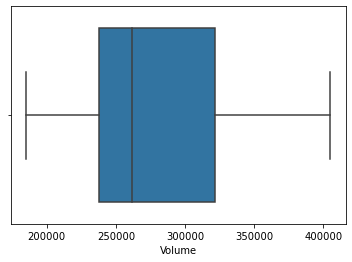

In [58]:
#checking for outliers
sns.boxplot(df.Volume)
# no outliers

In [59]:
ts=df.Volume

<AxesSubplot:xlabel='Periods'>

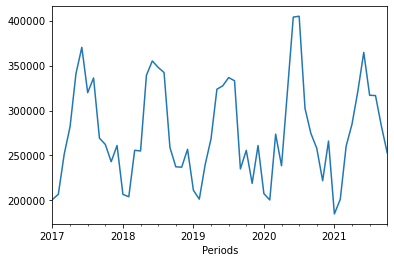

In [60]:
ts.plot()

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [62]:
decom = seasonal_decompose(ts, model='additive')

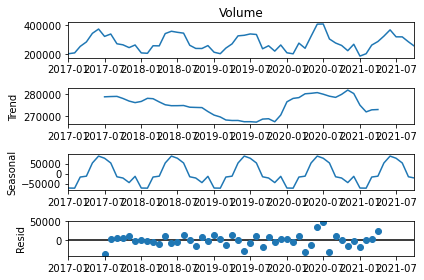

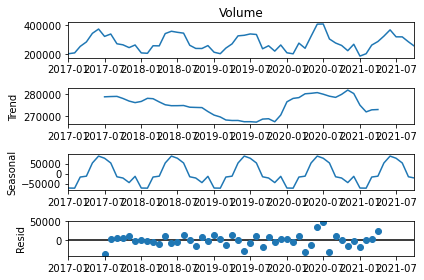

In [63]:
decom.plot()

In [64]:
#Is the series stationary?

# Performing Dickey-Fuller test to check
from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value: 0.3865135537910005  , since p-value is high, the series(ts) is not stationary

(-1.787843475355807,
 0.3865135537910005,
 11,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 1077.8835402103336)

In [259]:
ts_diff = ts.diff().dropna()

In [260]:
adfuller(ts_diff) #p-value=  9.548444267116841e-14, here p-value is below 5%, the series(ts_diff) is stationary but will check with difference of 1

(-8.545133783187595,
 9.548444267116841e-14,
 10,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 1058.0375621634303)

In [261]:
ts_diff = ts.diff().dropna()#Stationary series
ts_diff2=ts.diff(2).dropna()

<AxesSubplot:xlabel='Periods'>

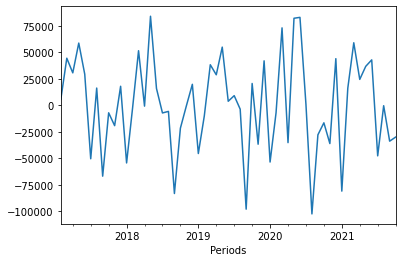

In [262]:
ts_diff.plot()

<AxesSubplot:xlabel='Periods'>

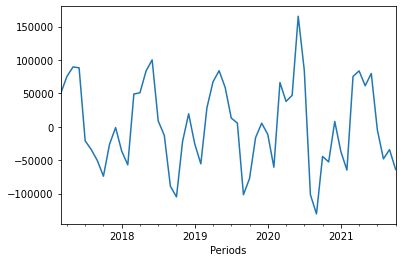

In [263]:
# Just to check if the series's distribution around mean is constant (for it to be stationary)
ts_diff2.plot()

# ACF and PACF to find out p and q values

In [264]:
import statsmodels.tsa.api as smt

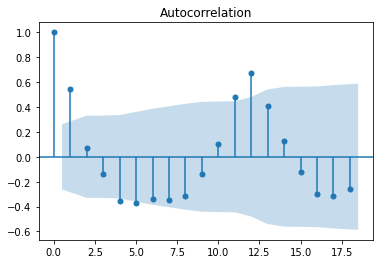

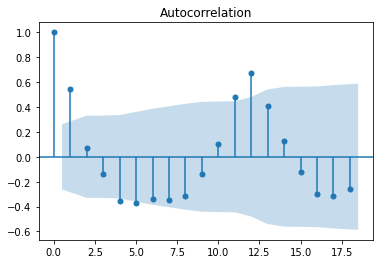

In [265]:
smt.graphics.plot_acf(ts_diff2)

In [266]:
# from the plots above q=1, Q=1 for ts_ln_diff as the input for SARIMAX model
# q value found based after which value of lag, the correlations becoming zero/close to 0 or crossing zero (positive to negative or negative to positive)
# since after 1 lag, the value no longer becomes significant, we take the value of q as 1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


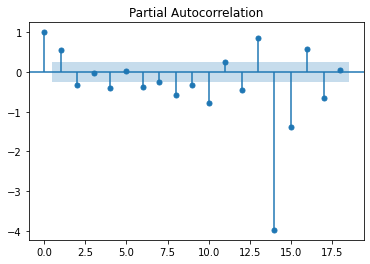

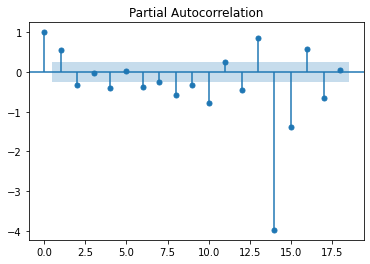

In [267]:
smt.graphics.plot_pacf(ts_diff2)

In [43]:
#Based on PACF - the value of p =1, P=1, since after 0 lag, it is crossing the significance threshold

In [44]:
#using above p,d,q values, we will come up with ranges to check which value is best value

#(p,d,q) = (1,2,1) # taking the difference of 1
#(P,D,Q,T) = (1,0,1,12) # assuming its stationary

In [268]:
Final_list1.columns

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'Tmax', 'June'], dtype='object')

In [377]:
# from the feature selection method, the following variables are taken as exogenous variables:

X=df[['Tmax','Industrial Production Index_Monthly','Covid_flag','Jan','June']]

ts = df.Volume

In [192]:
import statsmodels.api as sm

In [378]:
model1 = sm.tsa.statespace.SARIMAX(ts,
                                      exog = X,
                                      order=(1,2,1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

In [379]:
print(model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Volume   No. Observations:                   58
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -490.977
Date:                            Tue, 15 Feb 2022   AIC                           1001.953
Time:                                    13:29:47   BIC                           1019.330
Sample:                                01-01-2017   HQIC                          1008.323
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Tmax                                 1360.6656   2502.123      0

In [273]:
# Finding out the best value of p, d, q to get the best model results

In [149]:
from pmdarima import auto_arima

In [380]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [381]:
best_results = auto_arima(ts, X, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 2), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1502.8090871426257
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1035.9004130744752
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1164.4097202966025
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1395.10369555011
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1049.3366721976738
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1027.1307539224726
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:787.5639562310968
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1406.3423346302475
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1307.3274910968053
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1018.2439448950846
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1014.8456973997481
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1154.9430575482259
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1057.7159823769261
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1014.3795170060009
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:788.9737279211823
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1176.1989467306566
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1505.0198338807309
SARIMAX(0, 1, 0)x(

In [382]:
import statsmodels.api as sm


model2 = sm.tsa.statespace.SARIMAX(ts,
                                      exog = X,
                                      order=(1,1,1),
                                      seasonal_order=(1,1,0,12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

print(model2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Volume   No. Observations:                   58
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -366.770
Date:                             Tue, 15 Feb 2022   AIC                            751.541
Time:                                     13:30:42   BIC                            764.732
Sample:                                 01-01-2017   HQIC                           755.913
                                      - 10-01-2021                                         
Covariance Type:                               opg                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Tmax                                 1268.1760   1490.05

In [383]:
act = df.Volume
pred = model2.fittedvalues

In [384]:
print('Training Error:', np.mean(np.abs(act-pred)/act))

Training Error: 0.08345567612787713


<AxesSubplot:xlabel='Periods'>

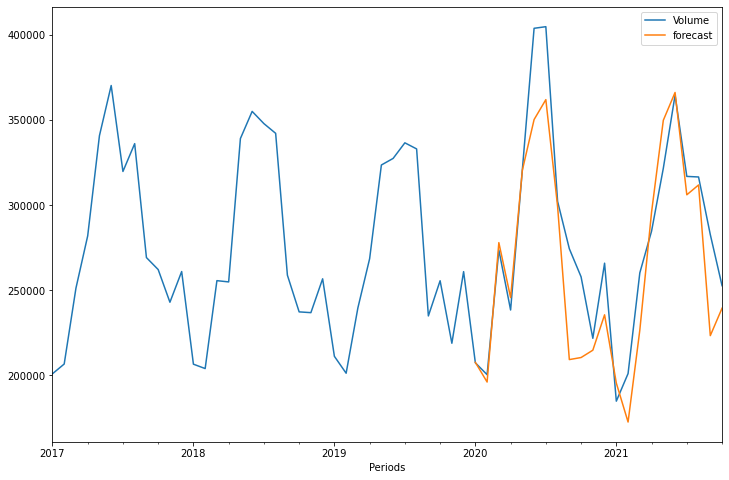

In [385]:
df['forecast']=model2 .predict(start='2020-01-01',end='2021-10-01',dynamic=True)
df[['Volume','forecast']].plot(figsize=(12,8))

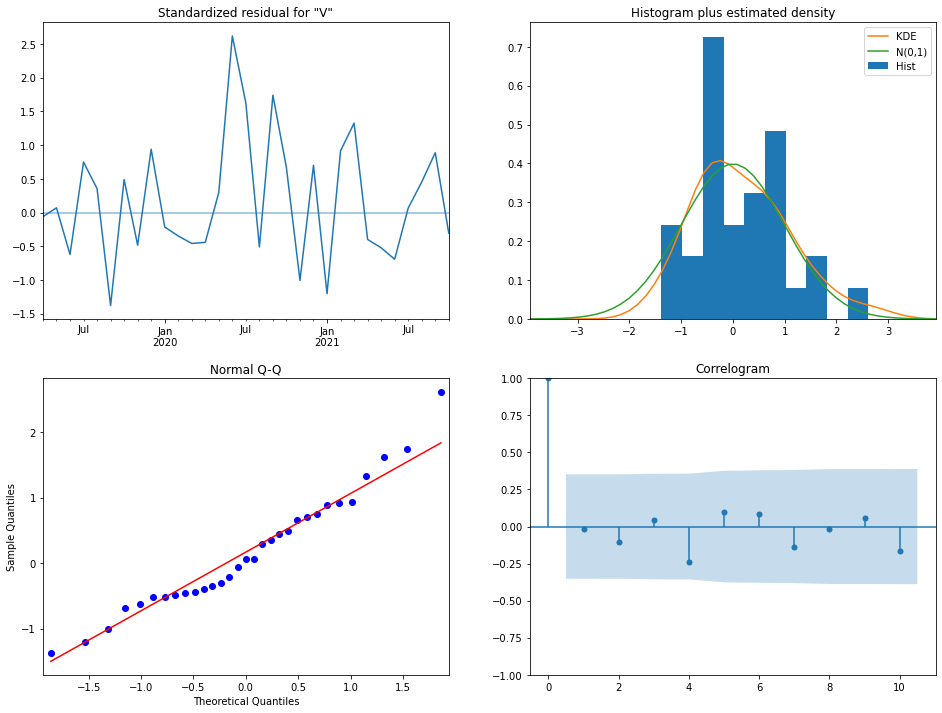

In [332]:
model2.plot_diagnostics(figsize=(16,12))
plt.show()

#Errors should follow normal distribution

In [ ]:
#As we can see from the image above, the residuals are uncorrelated,have zero mean and also follow a normal distribution 
#Hence we can say the model is fitted well

#  Linear Regression Model

In [65]:
df1=df_final.copy()

In [66]:
df1.drop('Periods',axis=1,inplace=True)

In [67]:
df1=df1[:'2021-10-01']
df1

,Prcp Total,Tavg,Tmax,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly",...,March,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Periods,,,,,,,,,,,,,,,,,,,,,
2017-01-01,42.0,20.5,27.4,102.798446,108.141005,103.139119,99.202982,875.377715,880.118585,1593.451595,...,0,0,0,0,0,0,0,0,0,0
2017-02-01,43.0,22.1,31.2,102.640416,107.625725,102.585456,99.937554,875.377715,880.118585,1593.451595,...,0,0,0,0,0,0,0,0,0,0
2017-03-01,39.0,23.9,33.7,102.482386,105.746715,102.976041,98.369110,875.377715,880.118585,1593.451595,...,1,0,0,0,0,0,0,0,0,0
2017-04-01,66.0,42.6,53.2,102.798446,106.948659,103.015607,98.593935,876.774817,895.936166,1583.857231,...,0,1,0,0,0,0,0,0,0,0
2017-05-01,78.0,51.0,61.3,102.640416,105.221726,104.310608,97.235334,876.774817,895.936166,1583.857231,...,0,0,1,0,0,0,0,0,0,0
2017-06-01,73.0,62.1,72.5,102.640416,107.897150,104.203939,98.549269,876.774817,895.936166,1583.857231,...,0,0,0,1,0,0,0,0,0,0
2017-07-01,68.0,66.2,77.1,102.798446,113.249076,104.510311,102.019135,961.162413,913.606886,1709.900205,...,0,0,0,0,1,0,0,0,0,0
2017-08-01,60.0,63.0,73.7,103.035491,114.154058,103.662038,103.250467,961.162413,913.606886,1709.900205,...,0,0,0,0,0,1,0,0,0,0
2017-09-01,48.0,59.8,70.6,103.272536,116.863036,103.942746,105.771793,961.162413,913.606886,1709.900205,...,0,0,0,0,0,0,1,0,0,0


In [68]:
df1.shape

(58, 38)

# Doing feature selection again to find  best features for linear model

Techniques used for Feature selection are:
1. Select K best
2. RFE through backward elimination using OLS regression
3. Correlation done earlier through bucketting

In [71]:
# Defining X and Y variables and converting them into numpy arrays 
X=df1.drop('Volume', axis=1)
Y=df1.Volume

In [ ]:
# Using a combination of Select K best and RFE(backward elimination to find the best features)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [85]:
X_reg=SelectKBest(score_func=f_regression, k=10).fit_transform(X,Y)

In [90]:
print(X_reg[:7])

[[42.  20.5 27.4 22.   0.   1.   0.   0.   0.   0. ]
 [43.  22.1 31.2 20.   0.   0.   1.   0.   0.   0. ]
 [39.  23.9 33.7 23.   0.   0.   0.   0.   0.   0. ]
 [66.  42.6 53.2 20.   0.   0.   0.   0.   0.   0. ]
 [78.  51.  61.3 23.   0.   0.   0.   1.   0.   0. ]
 [73.  62.1 72.5 22.   0.   0.   0.   0.   1.   0. ]
 [68.  66.2 77.1 21.   0.   0.   0.   0.   0.   1. ]]


In [91]:
# Comparing the above dataset with this original one to see which are the 10 best features selected through Select K best
pd.set_option('display.max_columns', None)
X.head(7)

,Prcp Total,Tavg,Tmax,Consumer Price Index_Monthly,"Index, Retail Sales, Nominal (US$ Value)_Monthly",Industrial Production Index_Monthly,"Wholesale-Producer Price Index, US$ basis_Monthly","Disposable Personal Income, US$_Quarterly","Disposable personal income, real, US$_Quarterly","Nominal GDP (Gross Domestic Product), US$_Quarterly","Nominal GDP Per Capita, US$_Quarterly","Nominal Gross Domestic Saving, US$_Quarterly","Nominal Gross Private Saving, US$_Quarterly","Nominal Private Consumption, US$_Quarterly",Population: Age Bracket 15-64_Quarterly,Population: Age Bracket 65+_Quarterly,Unemployment Rate_Quarterly,"Real Consumption Per Capita, US$_Quarterly","Real GDP (Gross Domestic Product), US$_Quarterly","Real GDP Per Capita, US$_Quarterly","Real GDP at Factor Cost: Services, US$_Quarterly",SD,StringencyIndex,Year,Covid_flag,Jan,Feb,March,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Periods,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,42.0,20.5,27.4,102.798446,108.141005,103.139119,99.202982,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,22,0.0,2017,0,1,0,0,0,0,0,0,0,0,0,0,0
2017-02-01,43.0,22.1,31.2,102.640416,107.625725,102.585456,99.937554,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,20,0.0,2017,0,0,1,0,0,0,0,0,0,0,0,0,0
2017-03-01,39.0,23.9,33.7,102.482386,105.746715,102.976041,98.369110,875.377715,880.118585,1593.451595,43879.69518,342.117623,357.142569,921.722522,24.679887,6.111323,6.700000,25821.41725,1602.073533,44117.12192,1074.545644,23,0.0,2017,0,0,0,1,0,0,0,0,0,0,0,0,0
2017-04-01,66.0,42.6,53.2,102.798446,106.948659,103.015607,98.593935,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,20,0.0,2017,0,0,0,0,1,0,0,0,0,0,0,0,0
2017-05-01,78.0,51.0,61.3,102.640416,105.221726,104.310608,97.235334,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,23,0.0,2017,0,0,0,0,0,1,0,0,0,0,0,0,0
2017-06-01,73.0,62.1,72.5,102.640416,107.897150,104.203939,98.549269,876.774817,895.936166,1583.857231,43514.93669,336.050564,339.206345,919.010534,24.704786,6.161413,6.533333,26093.27022,1618.463454,44465.70898,1086.717136,22,0.0,2017,0,0,0,0,0,0,1,0,0,0,0,0,0
2017-07-01,68.0,66.2,77.1,102.798446,113.249076,104.510311,102.019135,961.162413,913.606886,1709.900205,46788.59387,360.309764,372.112729,994.971392,24.728547,6.211645,6.233333,26224.99088,1625.291314,44473.41137,1088.698118,21,0.0,2017,0,0,0,0,0,0,0,1,0,0,0,0,0


In [89]:
X.columns

Index(['Prcp Total', 'Tavg', 'Tmax', 'Consumer Price Index_Monthly',
       'Index, Retail Sales, Nominal (US$ Value)_Monthly',
       'Industrial Production Index_Monthly',
       'Wholesale-Producer Price Index, US$ basis_Monthly',
       'Disposable Personal Income, US$_Quarterly',
       'Disposable personal income, real, US$_Quarterly',
       'Nominal GDP (Gross Domestic Product), US$_Quarterly',
       'Nominal GDP Per Capita, US$_Quarterly',
       'Nominal Gross Domestic Saving, US$_Quarterly',
       'Nominal Gross Private Saving, US$_Quarterly',
       'Nominal Private Consumption, US$_Quarterly',
       'Population: Age Bracket 15-64_Quarterly',
       'Population: Age Bracket 65+_Quarterly', 'Unemployment Rate_Quarterly',
       'Real Consumption Per Capita, US$_Quarterly',
       'Real GDP (Gross Domestic Product), US$_Quarterly',
       'Real GDP Per Capita, US$_Quarterly',
       'Real GDP at Factor Cost: Services, US$_Quarterly', 'SD',
       'StringencyIndex', 'Year',

In [92]:
Select_k_list=df[['Prcp Total', 'Tavg', 'Tmax','SD','Covid_flag',
                   'Jan','Feb','May','June','July']]

In [93]:
Select_k_list.corr()
# Removing Tavg variable since it is highly correlated with Tmax

,Prcp Total,Tavg,Tmax,SD,Covid_flag,Jan,Feb,May,June,July
Prcp Total,1.000000,0.582779,0.567099,0.183161,-0.144491,-0.235810,-0.308602,0.031097,0.241388,0.116022
Tavg,0.582779,1.000000,0.997989,0.163946,0.193235,-0.415081,-0.412854,0.155338,0.329041,0.418437
Tmax,0.567099,0.997989,1.000000,0.157349,0.209262,-0.420699,-0.394370,0.175174,0.337382,0.418789
SD,0.183161,0.163946,0.157349,1.000000,0.060561,0.208334,-0.531464,0.146684,-0.099915,0.146684
Covid_flag,-0.144491,0.193235,0.209262,0.060561,1.000000,-0.122859,-0.122859,0.233432,0.233432,0.055287
Jan,-0.235810,-0.415081,-0.420699,0.208334,-0.122859,1.000000,-0.094340,-0.094340,-0.094340,-0.094340
Feb,-0.308602,-0.412854,-0.394370,-0.531464,-0.122859,-0.094340,1.000000,-0.094340,-0.094340,-0.094340
May,0.031097,0.155338,0.175174,0.146684,0.233432,-0.094340,-0.094340,1.000000,-0.094340,-0.094340
June,0.241388,0.329041,0.337382,-0.099915,0.233432,-0.094340,-0.094340,-0.094340,1.000000,-0.094340
July,0.116022,0.418437,0.418789,0.146684,0.055287,-0.094340,-0.094340,-0.094340,-0.094340,1.000000


In [94]:
select_k_list=df[['Prcp Total','Tmax','SD','Covid_flag',
                   'Jan','Feb','May','June','July']]

In [99]:
select_k_list=df[[#'Prcp Total',
                'Tmax','SD','Covid_flag','Jan',
                 #'Feb',
                'May','June','July']]

In [100]:
# Cross checking through OLS , manually by finding the P value. Removing Variables one by one with high P-Values
regressor_OLS = sm.OLS(endog = Y, exog = select_k_list).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Volume   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1658.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    8.10e-58
Time:                        12:10:06   Log-Likelihood:                         -652.54
No. Observations:                  58   AIC:                                      1319.
Df Residuals:                      51   BIC:                                      1334.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tmax        1300.5208    183.548      7.085      0.000     932.033    1669.008
SD          9049.1331    434.541     20.825      0.000    8176.755    9921.511
Covid_flag  1.568e+04   8133.810      1.928      0.059    -649.992     3.2e+04
Jan         -3.21e+04   1.06e+04     -3.032      0.004   -5.33e+04   -1.08e+04
May         3.922e+04   1.02e+04      3.854      0.000    1.88e+04    5.96e+04
June         6.76e+04    1.1e+04      6.164      0.000    4.56e+04    8.96e+04
July        3.744e+04   1.11e+04      3.387      0.001    1.53e+04    5.96e+04
==============================================================================
Omnibus:                        1.053   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.591   Jarque-Bera (JB):                0.868
Skew:                           0.296   Prob(JB):                        0.648
Kurtosis:                       2.908   Cond. No.                         319.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
select_k_list=df[['Tmax','SD','Covid_flag','Jan','May','June','July']]

In [422]:
# Final_list1 is the list developed from bucketing and correlation
Final_list1.columns

Index(['Industrial Production Index_Monthly', 'Covid_flag', 'Tmax', 'June'], dtype='object')

In [118]:
#Combining the two lists, 1 from bucketing and correlation and the other from Select K best

lm_list=df1[['Tmax','SD','Covid_flag','Jan','May','June','July','Industrial Production Index_Monthly']]

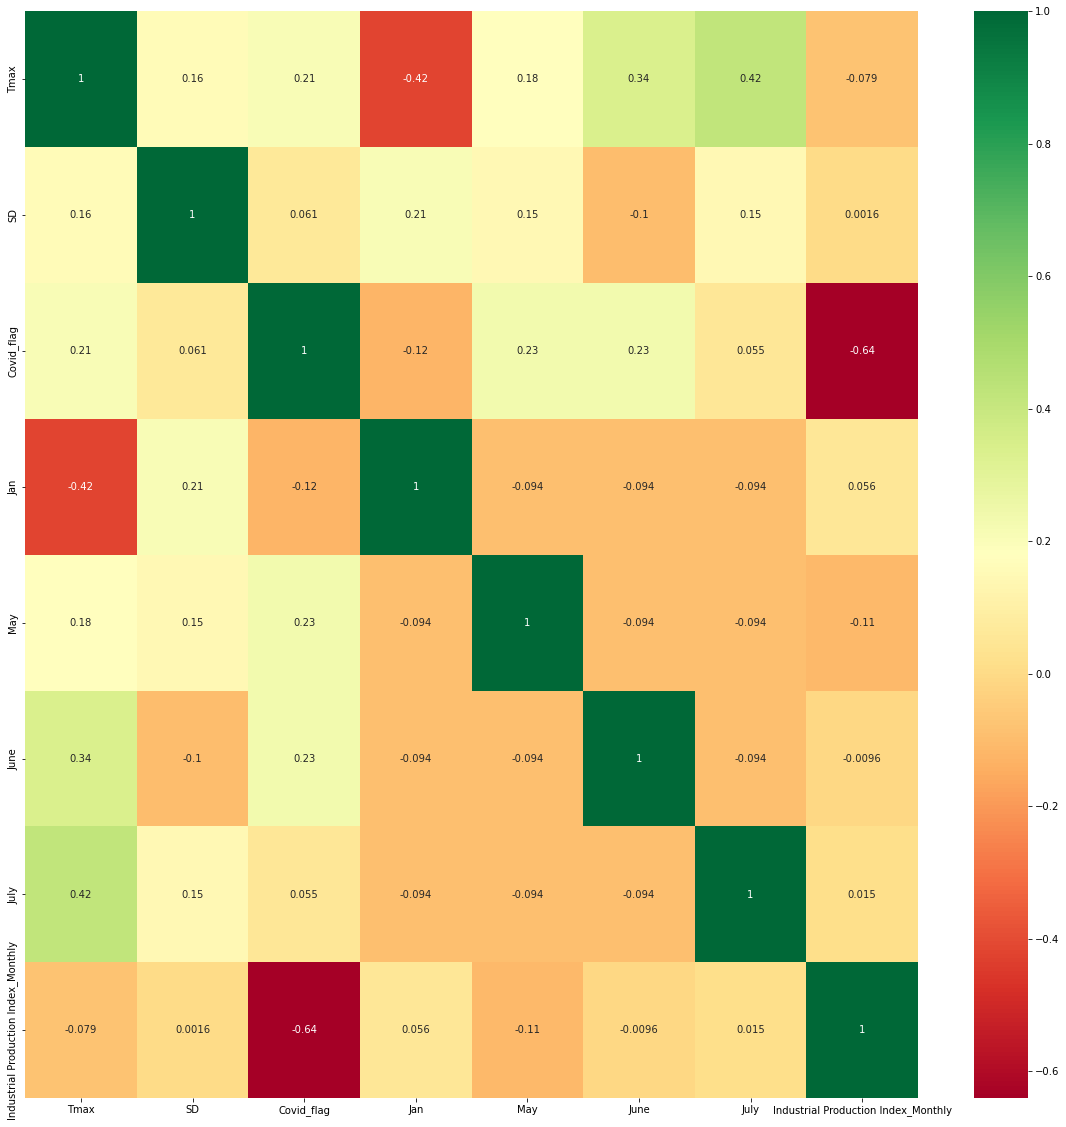

In [119]:
#Checking to see if the final list of variables are multi-colliniar
corrmat = lm_list.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(lm_list[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [104]:
y=df1.Volume

In [120]:
data_final = pd.concat([lm_list, y], axis=1)
data_final

,Tmax,SD,Covid_flag,Jan,May,June,July,Industrial Production Index_Monthly,Volume
Periods,,,,,,,,,
2017-01-01,27.4,22,0,1,0,0,0,103.139119,201003.079338
2017-02-01,31.2,20,0,0,0,0,0,102.585456,206740.982113
2017-03-01,33.7,23,0,0,0,0,0,102.976041,251304.277397
2017-04-01,53.2,20,0,0,0,0,0,103.015607,282019.251589
2017-05-01,61.3,23,0,0,1,0,0,104.310608,340877.156271
2017-06-01,72.5,22,0,0,0,1,0,104.203939,370348.171302
2017-07-01,77.1,21,0,0,0,0,1,104.510311,319858.682458
2017-08-01,73.7,23,0,0,0,0,0,103.662038,336205.904549
2017-09-01,70.6,21,0,0,0,0,0,103.942746,269271.145974


In [106]:
data_final.corr()

,Tmax,SD,Covid_flag,Jan,May,June,July,Industrial Production Index_Monthly,Volume
Tmax,1.000000,0.157349,0.209262,-0.420699,0.175174,0.337382,0.418789,-0.078571,0.840103
SD,0.157349,1.000000,0.060561,0.208334,0.146684,-0.099915,0.146684,0.001615,0.303114
Covid_flag,0.209262,0.060561,1.000000,-0.122859,0.233432,0.233432,0.055287,-0.640598,0.370255
Jan,-0.420699,0.208334,-0.122859,1.000000,-0.094340,-0.094340,-0.094340,0.056240,-0.414867
May,0.175174,0.146684,0.233432,-0.094340,1.000000,-0.094340,-0.094340,-0.111073,0.298977
June,0.337382,-0.099915,0.233432,-0.094340,-0.094340,1.000000,-0.094340,-0.009552,0.496220
July,0.418789,0.146684,0.055287,-0.094340,-0.094340,-0.094340,1.000000,0.014865,0.389087
Industrial Production Index_Monthly,-0.078571,0.001615,-0.640598,0.056240,-0.111073,-0.009552,0.014865,1.000000,-0.107873
Volume,0.840103,0.303114,0.370255,-0.414867,0.298977,0.496220,0.389087,-0.107873,1.000000


In [107]:
X=data_final.drop('Volume',axis=1)
Y=data_final.Volume

In [108]:
X_train=X[:'2020-11-01']
y_train=Y[:'2020-11-01']
X_test=X['2020-12-01':]
y_test=Y['2020-12-01':]

In [109]:
from sklearn import metrics

In [110]:
X_train

,Tmax,SD,Covid_flag,Jan,May,June,July,Industrial Production Index_Monthly
Periods,,,,,,,,
2017-01-01,27.4,22,0,1,0,0,0,103.139119
2017-02-01,31.2,20,0,0,0,0,0,102.585456
2017-03-01,33.7,23,0,0,0,0,0,102.976041
2017-04-01,53.2,20,0,0,0,0,0,103.015607
2017-05-01,61.3,23,0,0,1,0,0,104.310608
2017-06-01,72.5,22,0,0,0,1,0,104.203939
2017-07-01,77.1,21,0,0,0,0,1,104.510311
2017-08-01,73.7,23,0,0,0,0,0,103.662038
2017-09-01,70.6,21,0,0,0,0,0,103.942746


In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
lr.coef_

array([  1341.60753868,  12101.28874932,  33666.79178938, -32790.87465747,
        36318.85667191,  69118.87562961,  35414.34537086,   1202.90745897])

In [113]:
ypred=lr.predict(X_test)

In [114]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [115]:
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

(0.8852903890008055, 13987.861373313639, 17139.1794195544)

In [116]:
ypred_train=lr.predict(X_train)

In [117]:
r2_score(y_train, ypred_train)

0.8830892984903483